In [8]:
import sys
sys.path.insert(0,'/home/jovyan/work/src/')
from sqlalchemy import create_engine, MetaData, select
from sqlalchemy.orm import sessionmaker
from arise.barcode.metadata.orm.barcode import Barcode
from arise.barcode.metadata.orm.marker import Marker
from arise.barcode.metadata.orm.nsr_species import NsrSpecies
from arise.barcode.metadata.orm.nsr_synonym import NsrSynonym
from arise.barcode.metadata.orm.nsr_node import NsrNode
from arise.barcode.metadata.orm.specimen import Specimen
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
engine = create_engine('sqlite:////home/jovyan/work/data/sqlite/arise-barcode-metadata.db', echo=False)

# make session
Session = sessionmaker(engine)
session = Session()

In [56]:
nsr_barcodes = session.query(Barcode).all()
data = [el.marker.marker_name for el in nsr_barcodes]
df = pd.DataFrame(data, columns=['mn'])
    
# stmt = select(Barcode).limit(100)
# results = session.execute(stmt)

# for el in results:
#     print(el)
#     print(el.barcode_id, el.marker.marker_name)

# df = pd.read_sql(stmt, session.bind)
# print(df)
# print('end')



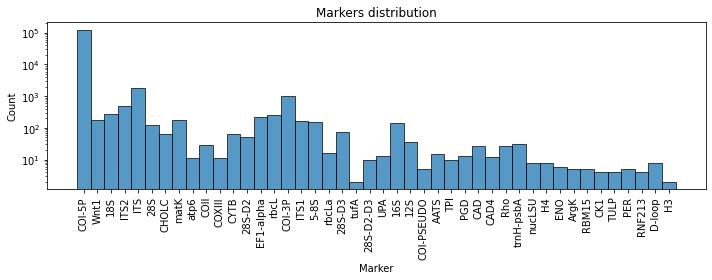

In [59]:
fig, ax = plt.subplots()
sb.histplot(data=df['mn'], ax=ax, discrete=True)
ax.set_title('Markers distribution')
ax.tick_params(axis="x", rotation=90)
ax.set_xlabel("Marker")
ax.set_ylabel("Count")
ax.set_yscale('log')
plt.gcf().set_size_inches(max(len(df['mn'].unique()) / 5, 10), 4)
fig.tight_layout()

In [62]:
nsr_barcodes = session.query(NsrSpecies).limit(10).all()
print(nsr_barcodes)
data = [el]
df = pd.DataFrame(data, columns=['mn'])

[<NsrSpecies(canonical_name='Epitonium trevelyanum')>, <NsrSpecies(canonical_name='Pachylaelaps pectinifer')>, <NsrSpecies(canonical_name='Hieracium cardiophyllum')>, <NsrSpecies(canonical_name='Suctobelbella hammerae')>, <NsrSpecies(canonical_name='Delavalia palustris')>, <NsrSpecies(canonical_name='Xorides alpestris')>, <NsrSpecies(canonical_name='Branta canadensis')>, <NsrSpecies(canonical_name='Bidens trichosperma')>, <NsrSpecies(canonical_name='Anacamptis laxiflora')>, <NsrSpecies(canonical_name='Ciconia abdimii')>]
